In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/train.csv")
df.sample(6)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
30459,30459,40,175,90,95.0,1.2,1.0,1,1,130,...,44,108,14.3,1,0.9,31,56,42,0,1
133106,133106,50,155,70,93.2,0.8,0.9,1,1,146,...,56,176,13.3,1,0.7,25,31,29,1,0
5431,5431,50,150,60,85.0,0.7,0.8,1,1,100,...,34,128,16.1,1,0.7,20,22,39,1,1
59181,59181,45,155,50,72.2,1.0,1.2,1,1,129,...,77,82,15.2,1,0.7,27,28,98,0,0
112225,112225,55,170,65,86.5,0.7,0.7,1,1,99,...,60,87,15.1,1,0.9,47,58,26,1,0
13673,13673,50,165,70,83.0,1.2,1.2,1,1,118,...,37,76,17.4,1,1.2,20,28,51,0,0


In [46]:
duplicates=df[df.duplicated()]

In [48]:
len(duplicates)

0

In [3]:
df.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [8]:
df.corr()["smoking"]

id                    -0.000632
age                   -0.206033
height(cm)             0.447111
weight(kg)             0.351748
waist(cm)              0.262715
eyesight(left)         0.100420
eyesight(right)        0.109781
hearing(left)         -0.038219
hearing(right)        -0.036858
systolic               0.058642
relaxation             0.109501
fasting blood sugar    0.096534
Cholesterol           -0.051896
triglyceride           0.331975
HDL                   -0.271186
LDL                   -0.072285
hemoglobin             0.450679
Urine protein         -0.028548
serum creatinine       0.272979
AST                    0.059394
ALT                    0.163016
Gtp                    0.305561
dental caries          0.106636
smoking                1.000000
Name: smoking, dtype: float64

In [10]:
df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [13]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,eyesight
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365,2.006787
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063,0.676190
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000,0.200000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000,1.600000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000,2.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000,2.400000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000,19.800000


In [11]:
df["eyesight"]=df["eyesight(left)"]+df["eyesight(right)"]

In [18]:
df.corr()["smoking"]

id                    -0.000632
age                   -0.206033
height(cm)             0.447111
weight(kg)             0.351748
waist(cm)              0.262715
eyesight(left)         0.100420
eyesight(right)        0.109781
hearing(left)         -0.038219
hearing(right)        -0.036858
systolic               0.058642
relaxation             0.109501
fasting blood sugar    0.096534
Cholesterol           -0.051896
triglyceride           0.331975
HDL                   -0.271186
LDL                   -0.072285
hemoglobin             0.450679
Urine protein         -0.028548
serum creatinine       0.272979
AST                    0.059394
ALT                    0.163016
Gtp                    0.305561
dental caries          0.106636
smoking                1.000000
eyesight               0.123408
Name: smoking, dtype: float64

In [19]:
df["bmi"]=df["height(cm)"]*0.01/df["weight(kg)"]

In [20]:
df.corr()["smoking"]

id                    -0.000632
age                   -0.206033
height(cm)             0.447111
weight(kg)             0.351748
waist(cm)              0.262715
eyesight(left)         0.100420
eyesight(right)        0.109781
hearing(left)         -0.038219
hearing(right)        -0.036858
systolic               0.058642
relaxation             0.109501
fasting blood sugar    0.096534
Cholesterol           -0.051896
triglyceride           0.331975
HDL                   -0.271186
LDL                   -0.072285
hemoglobin             0.450679
Urine protein         -0.028548
serum creatinine       0.272979
AST                    0.059394
ALT                    0.163016
Gtp                    0.305561
dental caries          0.106636
smoking                1.000000
eyesight               0.123408
bmi                   -0.286885
Name: smoking, dtype: float64

In [43]:
df.drop(["heightWaist","hearing"],axis=1,inplace=True)
df.corr()["smoking"]

id                    -0.000632
age                   -0.206033
height(cm)             0.447111
weight(kg)             0.351748
waist(cm)              0.262715
eyesight(left)         0.100420
eyesight(right)        0.109781
hearing(left)         -0.038219
hearing(right)        -0.036858
systolic               0.058642
relaxation             0.109501
fasting blood sugar    0.096534
Cholesterol           -0.051896
triglyceride           0.331975
HDL                   -0.271186
LDL                   -0.072285
hemoglobin             0.450679
Urine protein         -0.028548
serum creatinine       0.272979
AST                    0.059394
ALT                    0.163016
Gtp                    0.305561
dental caries          0.106636
smoking                1.000000
eyesight               0.123408
bmi                   -0.286885
Name: smoking, dtype: float64

In [30]:
def get_unique(col):
    print(col)
    print(df[col].unique())
    print()
for i in df.columns:
    get_unique(i)

id
[     0      1      2 ... 159253 159254 159255]

age
[55 70 20 35 30 50 45 40 60 25 65 75 80 85 62 69 49 58]

height(cm)
[165 170 180 160 155 175 150 181 145 185 140 190 135 139]

weight(kg)
[ 60  65  75  95  55  70  50  45  90  80  85 110  40 100 130 105  30 120
 115 125  35 101  89  82  83  99  79  88]

waist(cm)
[ 81.   89.  105.   80.5  51.   69.   84.5  73.   68.   64.   80.  103.
  81.8  78.   92.   71.5  90.   93.   85.   86.4  84.   66.   75.   87.5
  91.5  76.   87.   71.   86.   83.   87.2  94.   91.   70.   88.   72.
  93.1  70.4  79.   77.   82.   87.8  97.   85.5  67.   87.3 114.   95.2
  67.2  99.   65.   90.5  74.   73.5  95.   75.8  77.2  98.   91.1  62.
  90.2 101.   89.6  83.4  68.5  72.5  85.7  87.1  59.   89.5 108.5  90.1
  91.8  86.2  72.8  73.2  89.8  86.3 100.   81.5  97.5  76.2  94.5  79.4
  98.5  78.4  90.8  88.4  98.4  94.2  79.7  83.5  93.6  89.9  93.2  89.2
  71.2  92.8  88.2  65.6 101.8  97.8  72.4  75.6  69.8  84.2  60.   92.3
  83.8  75.4  77.6  95.5  

In [32]:
def lowCols(col):
    if len(df[col].unique())<3:
        print(col)
for i in df.columns:
    lowCols(i)

hearing(left)
hearing(right)
dental caries
smoking


<AxesSubplot:xlabel='bmi', ylabel='Count'>

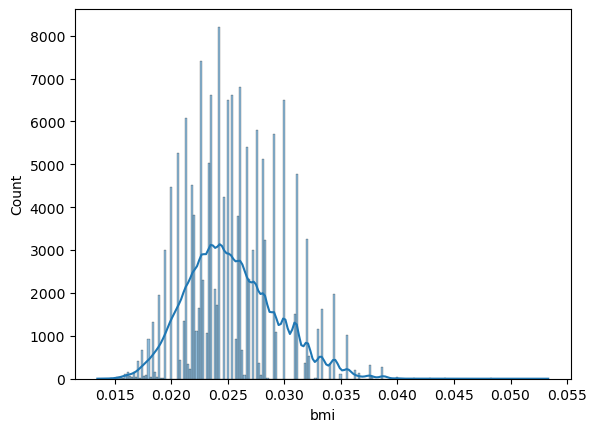

In [60]:
sns.histplot(df,x=df["bmi"],kde=True)

<AxesSubplot:xlabel='bmi'>

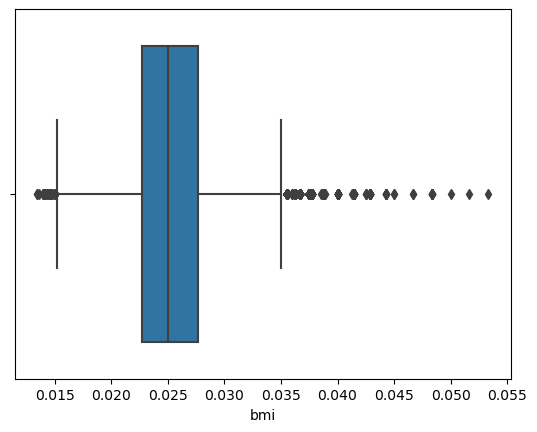

In [66]:
sns.boxplot(data=df,x="bmi")

In [84]:
plt.boxplot?

Signature:
plt.boxplot(
    x,
    notch=None,
    sym=None,
    vert=None,
    whis=None,
    positions=None,
    widths=None,
    patch_artist=None,
    bootstrap=None,
    usermedians=None,
    conf_intervals=None,
    meanline=None,
    showmeans=None,
    showcaps=None,
    showbox=None,
    showfliers=None,
    boxprops=None,
    labels=None,
    flierprops=None,
    medianprops=None,
    meanprops=None,
    capprops=None,
    whiskerprops=None,
    manage_ticks=True,
    autorange=False,
    zorder=None,
    *,
    data=None,
)
Docstring:
Draw a box and whisker plot.

The box extends from the first quartile (Q1) to the third
quartile (Q3) of the data, with a line at the median.  The
whiskers extend from the box by 1.5x the inter-quartile range
(IQR).  Flier points are those past the end of the whiskers.
See https://en.wikipedia.org/wiki/Box_plot for reference.

.. code-block:: none

          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o  

C:\Users\25bak\AppData\Local\Temp\ipykernel_9520\337064181.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


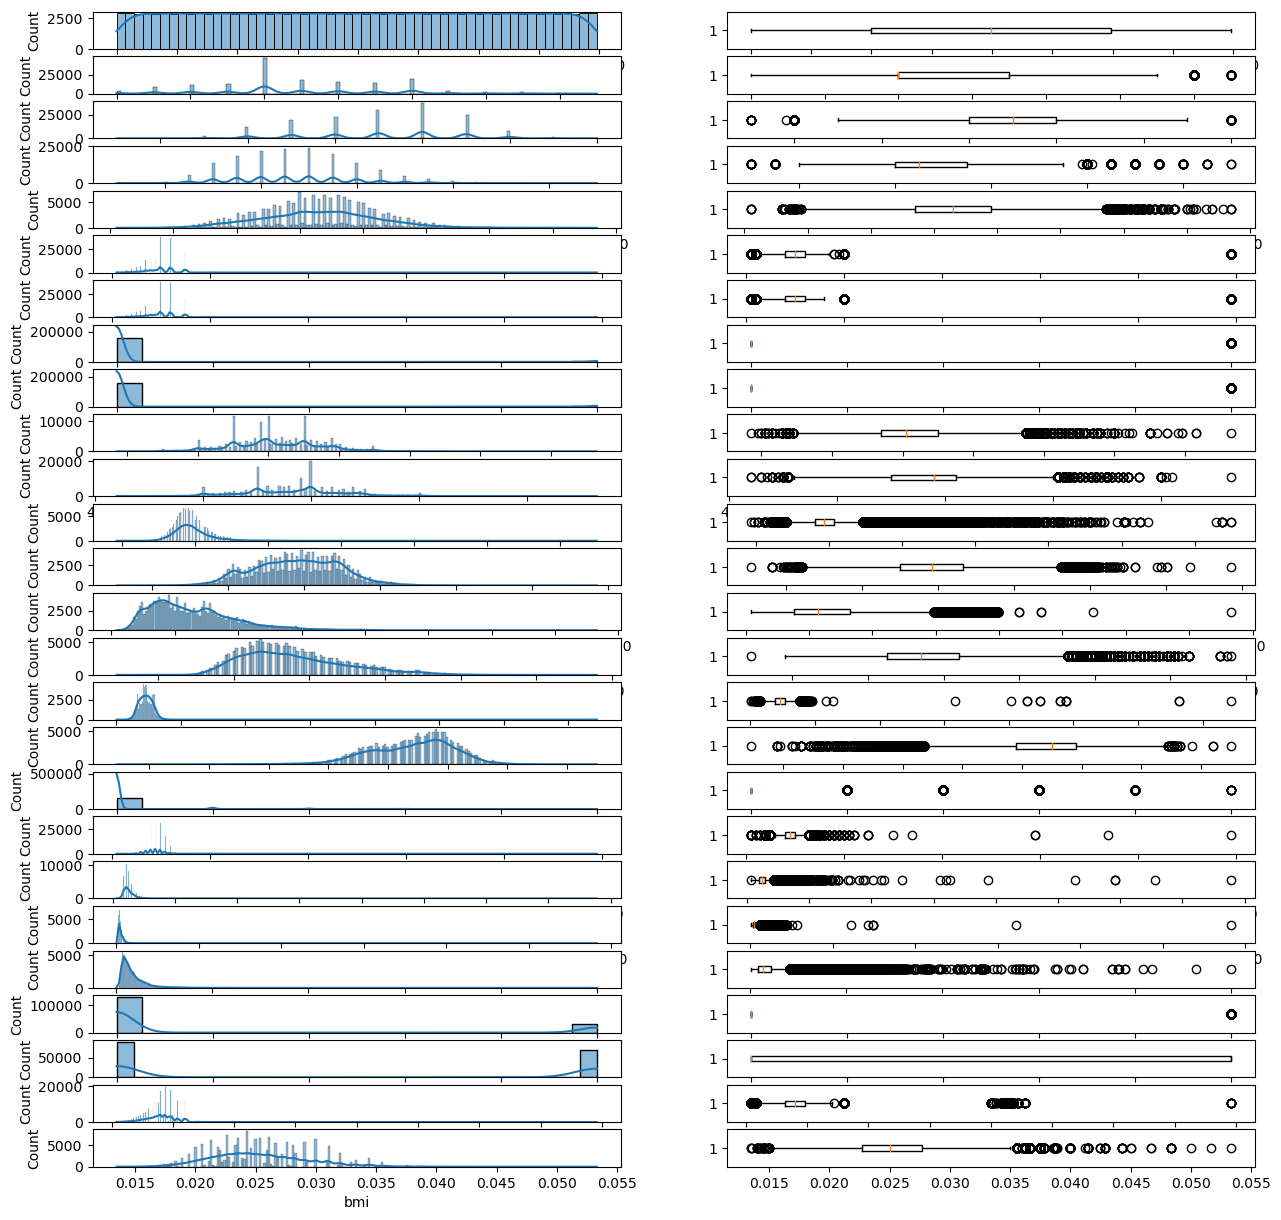

In [88]:
def plotSkew(i,col):
    plt.subplot(len(df.columns),2,2*i+1)
    sns.histplot(data=df,x=col,kde=True)
    plt.subplot(len(df.columns),2,2*i+2)
    plt.boxplot(data=df,x=col,vert=False)
plt.figure(figsize=(15,15))
for i,col in enumerate(df.columns):
    plotSkew(i,col)
plt.tight_layout()
plt.show()

In [79]:
for i,col in enumerate(df.columns):
    plotSkew(i,col)

ValueError: Number of columns must be a positive integer, not 0

<Figure size 640x480 with 0 Axes>